### Marketing Attribution Model
### Objective

Develop a data-driven approach to allocate conversion credits across marketing channels effectively. Analyze and compare the results against the Last-Click Attribution Model.
### Guidelines & Parameters
Attribution Window: 30 days.
 The dataset is simulated but reflects a structure aligned with prior marketing analyses.

In [ ]:
#!pip install gdown

In [8]:
import gdown
import pandas as pd

file_id = "1wr0-a3ZHdJiSSsWBUGZe0dKGsdU_pt3T"
output = "marketing_attribution.csv"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

# Load into Pandas
df = pd.read_csv(output)
print(df.head())


Downloading...
From: https://drive.google.com/uc?id=1wr0-a3ZHdJiSSsWBUGZe0dKGsdU_pt3T
To: c:\Users\pooya\Documents\Python\Mar_cls\marketing_attribution.csv
100%|██████████| 75.5M/75.5M [00:07<00:00, 9.45MB/s]
C:\Users\pooya\AppData\Local\Temp\ipykernel_45220\2133824237.py:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(output)


         fullVisitorId        date     visitId  visitStartTime  \
0  9416183380303809617  2016-12-17  1481990278      1481990278   
1   342964634359205532  2016-12-17  1481999067      1481999067   
2   294887852901730140  2016-12-17  1481997033      1481997033   
3  2904105592463883270  2016-12-17  1482038661      1482038661   
4  8140805711484568839  2016-12-17  1482030051      1482030051   

  channelGrouping utm_source utm_medium  transactionRevenue transactionId  
0  Organic Search        ask    organic                 NaN           NaN  
1  Organic Search        ask    organic                 NaN           NaN  
2  Organic Search        ask    organic                 NaN           NaN  
3         Display        dfa        cpm                 NaN           NaN  
4         Display        dfa        cpm                 NaN           NaN  


In [10]:

#import pandas as pd
#removed the import ace_tools
#define the dummy function
def display_dataframe_to_user(name, dataframe):
    print(f"Displaying {name}:")
    print(dataframe.to_markdown(index=False))

data = df.copy()
# Create a data dictionary as a pandas DataFrame
import pandas as pd
from IPython.display import display

# Create the data dictionary as a pandas DataFrame
data_dictionary = pd.DataFrame({
    "Column Name": [
        "fullVisitorId", "date", "visitId", "visitStartTime",
        "channelGrouping", "utm_source", "utm_medium",
        "transactionRevenue", "transactionId", "conversion"
    ],
    "Description": [
        "Unique identifier for each visitor.",
        "Date of the visit in YYYY-MM-DD format.",
        "Unique identifier for each visit/session.",
        "Start time of the visit/session, converted to a human-readable datetime format.",
        "Marketing channel associated with the session (e.g., Direct, Organic Search).",
        "Source of traffic (e.g., Facebook, Google).",
        "Medium of the traffic (e.g., organic, cpc).",
        "Revenue generated by a transaction, in float format (0.0 if no transaction).",
        "Unique identifier for each transaction (empty if no transaction occurred).",
        "Boolean column indicating whether a transaction occurred (True/False)."
    ]
})

# Styling the table
styled_data_dictionary = (
    data_dictionary.style
    .set_properties(**{'text-align': 'left'})  # Align text to the left for better readability
    .set_table_styles([
        {"selector": "th", "props": [("background-color", "#341931"), ("color", "white"), ("text-align", "center"), ("font-size", "14px"), ("padding", "10px")]},
        {"selector": "td", "props": [("background-color", "#C49DA3"), ("color", "black"), ("font-size", "12px"), ("padding", "8px")]}
    ])
    .hide(axis="index")  # Hide the index column
)

# Display the beautifully styled table
display(styled_data_dictionary)


Column Name,Description
fullVisitorId,Unique identifier for each visitor.
date,Date of the visit in YYYY-MM-DD format.
visitId,Unique identifier for each visit/session.
visitStartTime,"Start time of the visit/session, converted to a human-readable datetime format."
channelGrouping,"Marketing channel associated with the session (e.g., Direct, Organic Search)."
utm_source,"Source of traffic (e.g., Facebook, Google)."
utm_medium,"Medium of the traffic (e.g., organic, cpc)."
transactionRevenue,"Revenue generated by a transaction, in float format (0.0 if no transaction)."
transactionId,Unique identifier for each transaction (empty if no transaction occurred).
conversion,Boolean column indicating whether a transaction occurred (True/False).


### DATA PROCESSING

In [12]:

# Import required libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
#file_path = "C:/Users/farsharb/OneDrive - Publicis Groupe/Desktop/Marketing Analytics/marketing_attribution/marketing_attribution.csv"
#data = pd.read_csv(file_path)

# Handle missing values
data['transactionRevenue'] = data['transactionRevenue'].fillna(0)
data['transactionId'] = data['transactionId'].fillna("")

# Convert visitStartTime to a datetime format for better analysis
data['visitStartTime'] = pd.to_datetime(data['visitStartTime'], unit='s')

# Create a flag for conversion activity
data['conversion'] = data['transactionRevenue'] > 0

# Inspect the processed data
print("Data after preprocessing:")
data.head()


Data after preprocessing:


,fullVisitorId,date,visitId,visitStartTime,channelGrouping,utm_source,utm_medium,transactionRevenue,transactionId,conversion
0,9416183380303809617,2016-12-17,1481990278,2016-12-17 15:57:58,Organic Search,ask,organic,0.0,,False
1,342964634359205532,2016-12-17,1481999067,2016-12-17 18:24:27,Organic Search,ask,organic,0.0,,False
2,294887852901730140,2016-12-17,1481997033,2016-12-17 17:50:33,Organic Search,ask,organic,0.0,,False
3,2904105592463883270,2016-12-17,1482038661,2016-12-18 05:24:21,Display,dfa,cpm,0.0,,False
4,8140805711484568839,2016-12-17,1482030051,2016-12-18 03:00:51,Display,dfa,cpm,0.0,,False


### EDA - Exploratory Data Analysis

In [13]:
# Calculate Overall Conversion Metrics
eda_part1 = {
    "Total Visits": len(data),
    "Total Conversions": data['conversion'].sum(),
    "Total Non-Conversions": (~data['conversion']).sum(),
    "Conversion Rate (%)": (data['conversion'].mean() * 100)
}

# Convert the metrics into a DataFrame
eda_part1_df = pd.DataFrame(list(eda_part1.items()), columns=["Metric", "Value"])

# Styling the table
styled_eda_part1 = (
    eda_part1_df.style
    .set_properties(**{'text-align': 'left'})  # Align text to the left for better readability
    .set_table_styles([
        {"selector": "th", "props": [("background-color", "#341931"), ("color", "white"), ("text-align", "center"), ("font-size", "14px"), ("padding", "10px")]},
        {"selector": "td", "props": [("background-color", "#C49DA3"), ("color", "black"), ("font-size", "12px"), ("padding", "8px")]}
    ])
    .hide(axis="index")  # Hide the index column
    .format({"Value": "{:,.2f}"})  # Format numbers with commas and 2 decimal places
)

# Display the beautifully styled table
display(styled_eda_part1)

Metric,Value
Total Visits,"903,653.00"
Total Conversions,"11,515.00"
Total Non-Conversions,"892,138.00"
Conversion Rate (%),1.27


In this section, we aim to understand how different marketing channels contribute to conversions. Specifically, we will analyze:

    The total number of visits for each channel.
    The total number of conversions attributed to each channel.
    The conversion rate (percentage of visits resulting in conversions) for each channel.

This analysis will help us identify which marketing channels are performing well and which need improvement.

In [14]:
# Exploratory Data Analysis - PART 2
# Aggregating conversion data by marketing channel
channel_conversions = data.groupby('channelGrouping')['conversion'].sum()
channel_visits = data.groupby('channelGrouping').size()
channel_conversion_rate = (channel_conversions / channel_visits) * 100

# Create a DataFrame to display the results
eda_part2_df = pd.DataFrame({
    "Channel": channel_conversion_rate.index,
    "Total Conversions": channel_conversions.values,
    "Total Visits": channel_visits.values,
    "Conversion Rate (%)": channel_conversion_rate.values
}).sort_values(by="Conversion Rate (%)", ascending=False)

# Format the DataFrame for better readability, excluding the index column
styled_table = (
    eda_part2_df.reset_index(drop=True)  # Remove the default index
    .style
    .background_gradient(cmap='Blues', subset=["Conversion Rate (%)"])
    .format({
        "Total Conversions": "{:,}",
        "Total Visits": "{:,}",
        "Conversion Rate (%)": "{:.4f}%",
    })
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center"), ("font-size", "16px")]},
        {"selector": "td", "props": [("font-size", "16px")]}
    ])
)

# Display the styled table without the index
display(styled_table)



,Channel,Total Conversions,Total Visits,Conversion Rate (%)
0,Referral,"5,311","104,838",5.0659%
1,Display,142,"6,262",2.2676%
2,Paid Search,468,"25,326",1.8479%
3,Direct,"2,042","143,026",1.4277%
4,Organic Search,"3,438","381,561",0.9010%
5,(Other),1,120,0.8333%
6,Affiliates,9,"16,403",0.0549%
7,Social,104,"226,117",0.0460%


The analysis reveals significant insights:


*    **Referral** emerges as the most effective channel, with the highest conversion rate and a significant share of conversions.
*   Channels like **Display** and **Paid Search** show promising conversion rates, albeit with smaller traffic volumes.
*   **Direct** and **Organic Search** have lower conversion rates but bring substantial traffic, indicating potential areas for optimization.
*    Channels like **Affiliates** and **Social** have minimal contributions and the lowest conversion rates, suggesting these channels might require reevaluation of strategy or further investment.



In this step, the focus shifts from conversion rates to understanding how much each marketing channel contributes to the total conversions. This analysis is critical for identifying the primary drivers of conversions and allocating resources effectively. We aim to:


1.       Calculate the percentage of total conversions contributed by each channel.
2.   Highlight channels that play a dominant role in overall performance.



    

In [15]:
# Contribution of each channel to total conversions
channel_contribution = (data.groupby('channelGrouping')['conversion'].sum() / data['conversion'].sum()) * 100

# Create a DataFrame for displaying the contribution percentages
eda_part3_df = pd.DataFrame({
    "Channel": channel_contribution.index,
    "Conversion Contribution (%)": channel_contribution.values
}).sort_values(by="Conversion Contribution (%)", ascending=False)

# Remove the index explicitly for display purposes
eda_part3_df = eda_part3_df.reset_index(drop=True)  # Ensure the index is dropped

# Format the DataFrame for better readability
styled_table_part3 = (
    eda_part3_df.style
    .background_gradient(cmap='Greens', subset=["Conversion Contribution (%)"])
    .format({"Conversion Contribution (%)": "{:.5f}%"})  # Keep consistent precision
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center"), ("font-size", "16px")]},
        {"selector": "td", "props": [("font-size", "16px")]}
    ])
)

# Display the styled table
from IPython.display import display
display(styled_table_part3)


,Channel,Conversion Contribution (%)
0,Referral,46.12245%
1,Organic Search,29.85671%
2,Direct,17.73339%
3,Paid Search,4.06426%
4,Display,1.23317%
5,Social,0.90317%
6,Affiliates,0.07816%
7,(Other),0.00868%


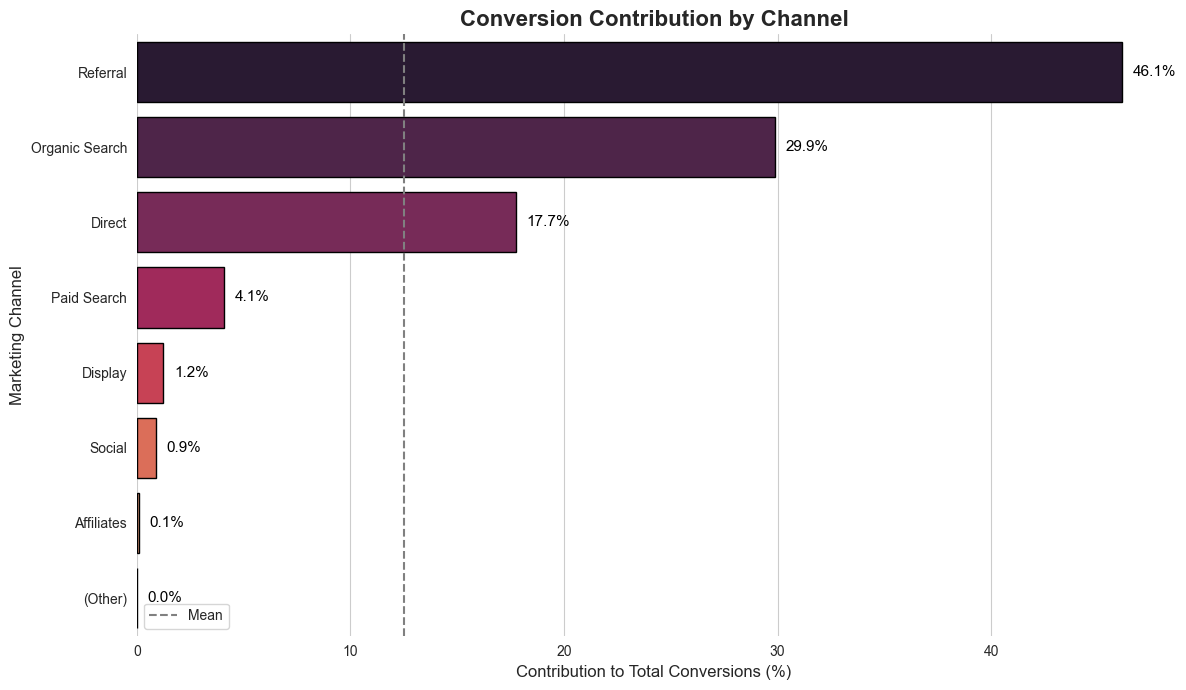

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# SAMPLE DATA (Replace with your actual data)
# eda_part3_df = pd.DataFrame({
#     "Channel": ["Referrals", "Organic Search", "Direct", "Paid Search", "Display", "Affiliates", "Social"],
#     "Conversion Contribution (%)": [46.2, 29.7, 17.7, 4.0, 1.2, 0.9, 0.3]
# })

# Sort your DataFrame by conversion contribution in descending order
eda_part3_sorted = eda_part3_df.sort_values(by="Conversion Contribution (%)", ascending=False)

# Set a pleasing style and create a figure
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Use a well-contrasted, eye-catching palette
palette = sns.color_palette("rocket", n_colors=len(eda_part3_sorted))

# Create a horizontal bar chart (easier to read when channel names can be long)
ax = sns.barplot(
    data=eda_part3_sorted,
    x="Conversion Contribution (%)",
    y="Channel",
    palette=palette,
    edgecolor="black"
)

# Annotate each bar with its percentage value
for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + 0.5,  # Slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,
        f"{width:.1f}%",  # Format to 1 decimal place
        va="center",
        fontsize=11,
        color="black"
    )

# Optionally, add a vertical line for the average or another reference
mean_contribution = eda_part3_sorted["Conversion Contribution (%)"].mean()
plt.axvline(mean_contribution, color="gray", linestyle="--", linewidth=1.5, label="Mean")

# Set titles and labels
ax.set_title("Conversion Contribution by Channel", fontsize=16, fontweight='bold')
ax.set_xlabel("Contribution to Total Conversions (%)", fontsize=12)
ax.set_ylabel("Marketing Channel", fontsize=12)

# Remove unnecessary chart borders/spines for a cleaner look
sns.despine(left=True, bottom=True)

# Show legend if you choose to display any reference lines
plt.legend()

# Ensure the chart layout is tight so labels are fully visible
plt.tight_layout()

# Display the plot
plt.show()



*  Referrals: Over 46% of total conversions, holding the top spot.
*  Organic Search: Nearly 30%, representing a key conversion driver.
* Direct: About 17.7%, securing a significant share.
* Paid Search: Approximately 4%, a smaller yet noteworthy contribution.
* Display: Around 1.2%, making a modest impact.
* Affiliates & Social: Minimal overall influence, rounding out the remaining channels.

### **Defining User Journeys with a 30-Day Attribution Window**

We need to identify user journeys, focusing on their interactions with marketing channels within a 30-day attribution window before a conversion or their last visit. This step will help us attribute conversions more accurately to the contributing touchpoints.

Sequence of channels (channels) the user interacted with.
Whether a conversion occurred (conversion).
The total number of touchpoints (number_of_touchpoints)

In [17]:
from datetime import timedelta

# Define the 30-day attribution window
time_window = timedelta(days=30)

# Sort data by visitor and visit start time for proper grouping
data = data.sort_values(by=['fullVisitorId', 'visitStartTime'])

# Initialize a list to store user journeys
user_journeys = []

# Group data by visitor ID
for visitor, visits in data.groupby('fullVisitorId'):
    if visits['conversion'].any():  # If a conversion exists for this visitor
        conversion_time = visits[visits['conversion']]['visitStartTime'].max()  # Get latest conversion time
        window_start = conversion_time - time_window  # Define the start of the attribution window
        journey_data = visits[(visits['visitStartTime'] >= window_start) & (visits['visitStartTime'] <= conversion_time)]
    else:  # If no conversion exists, take all visits
        journey_data = visits

    # Collect channel sequence and other details for the journey
    journey = {
        'fullVisitorId': visitor,
        'channels': journey_data['channelGrouping'].tolist(),
        'conversion': journey_data['conversion'].any(),
        'number_of_touchpoints': len(journey_data)
    }
    user_journeys.append(journey)

# Create a DataFrame for user journeys
user_journeys_df = pd.DataFrame(user_journeys)


# Format the DataFrame for better readability
from IPython.display import display

styled_user_journeys = (
    user_journeys_df.head(10)  # Display the first 10 rows for brevity
    .style
    .set_properties(**{'text-align': 'center'})  # Center-align the text
    .background_gradient(cmap="coolwarm", subset=["number_of_touchpoints"])  # Highlight the number of touchpoints
    .format({
        "channels": lambda x: ', '.join(x),  # Display channels as a comma-separated string
        "conversion": lambda x: "Yes" if x else "No",  # Replace boolean with "Yes"/"No"
    })
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center"), ("font-size", "12px")]},
        {"selector": "td", "props": [("font-size", "12px")]}
    ])
)

# Display the styled table
display(styled_user_journeys)



,fullVisitorId,channels,conversion,number_of_touchpoints
0,4823595352351,Organic Search,No,1
1,5103959234087,Organic Search,No,1
2,10278554503158,Organic Search,No,1
3,20424342248747,Organic Search,No,1
4,26722803385797,Organic Search,No,1
5,27376579751715,Organic Search,No,1
6,33471059618621,Social,No,1
7,35794135966385,Direct,No,1
8,39460501403861,Social,No,1
9,40862739425590,"Paid Search, Paid Search",No,2


The constructed table presents:

  * Individual user journeys: A detailed view of how users navigated different channels.
  * Conversion Behavior: Identifies users who converted and their touchpoint sequences.
  * Engagement Levels: Highlights users with high touchpoints, showing more complex journeys.

This analysis lays the groundwork for deeper insights into multi-channel attribution, enabling targeted strategy optimization.

### **Last-Click Attribution Model**

The last-click attribution model assigns 100% of the credit for a conversion to the final channel a user interacted with before converting. This part will evaluate the contribution of each channel under the last-click model.

In [18]:
# Initialize a dictionary to store last-click conversions
last_click_conversions = {}

# Iterate through user journeys
for _, row in user_journeys_df.iterrows():
    if row['conversion']:  # Only consider users who converted
        # Safely access the last channel in the journey
        last_channel = row['channels'][-1] if row['channels'] else None
        if last_channel:  # Ensure the channel exists
            if last_channel not in last_click_conversions:
                last_click_conversions[last_channel] = 0
            last_click_conversions[last_channel] += 1

# Calculate total conversions to compute percentages
total_conversions = sum(last_click_conversions.values())

# Convert the results to a DataFrame with percentages
last_click_df = pd.DataFrame({
    "Channel": list(last_click_conversions.keys()),
    "Last-Click Conversion (%)": [
        (count / total_conversions) * 100 for count in last_click_conversions.values()
    ]
}).sort_values(by="Last-Click Conversion (%)", ascending=False)

# Handle empty or missing data scenarios
if last_click_df.empty:
    print("No conversions recorded in the dataset.")
else:
    # Format the DataFrame for better readability
    from IPython.display import display

    styled_last_click = (
        last_click_df
        .style
        .set_properties(**{'text-align': 'center'})  # Center-align text
        .background_gradient(cmap="YlGn", subset=["Last-Click Conversion (%)"])  # Highlight percentages
        .format({"Last-Click Conversion (%)": "{:.2f}%"})  # Properly format as percentages
        .set_table_styles([
            {"selector": "th", "props": [("text-align", "center"), ("font-size", "14px")]},
            {"selector": "td", "props": [("font-size", "12px")]}
        ])
    )

    # Display the styled table
    display(styled_last_click)


,Channel,Last-Click Conversion (%)
1,Referral,45.86%
2,Organic Search,30.87%
0,Direct,16.85%
4,Paid Search,4.24%
3,Display,1.12%
5,Social,0.97%
6,Affiliates,0.09%
7,(Other),0.01%


* Referral as the Top Performer:

  The Referral channel leads as the most impactful last touchpoint, contributing 4,724 conversions. This emphasizes its crucial role in closing transactions.

* Organic Search in Second Place:

  Organic Search accounts for 3,180 conversions, showcasing its effectiveness in driving users to complete their journeys. This indicates strong organic brand visibility and user trust.

* Direct Channel's Importance:

   Direct Traffic secures third place with 1,736 last-click conversions. This highlights the significance of returning customers or brand-aware users directly accessing the site.

* Paid Search and Display Channels:

   Paid Search generated 437 last-click conversions, followed by Display with 115 conversions. These channels are effective but may require further optimization to play a larger role in finalizing transactions.

* Low-Performing Channels:

  Channels like Social (100 conversions), Affiliates (9 conversions), and Other (1 conversion) contribute minimally as last touchpoints. These results suggest they might play a more significant role earlier in the user journey or need better targeting strategies.

### Shapley Value Attribution
The Last-Click Attribution Model gave full credit to the final channel before conversion, which can undervalue earlier channels that played significant roles in the user's journey. The Shapley Value model addresses this limitation by fairly distributing credit among all channels based on their relative contribution.

Goals:

  * To evaluate the impact of all channels in the conversion journey.
  * To identify channels that may influence users earlier in their path but are underrepresented in other attribution models.

In [22]:
import itertools

# Define a function to calculate Shapley Values
def calculate_shapley(user_journeys_df):
    # Get all unique channels
    channels = set(itertools.chain.from_iterable(user_journeys_df['channels']))
    shapley_values = {channel: 0 for channel in channels}

    # Count total conversions
    total_conversions = user_journeys_df['conversion'].sum()

    # Calculate Shapley Value for each channel
    for _, journey in user_journeys_df.iterrows():
        if journey['conversion']:
            n = len(journey['channels'])
            for channel in journey['channels']:
                # Each channel's marginal contribution is 1/n for the journey
                marginal_contribution = 1 / n
                shapley_values[channel] += marginal_contribution

    # Normalize Shapley Values to percentages
    for channel in shapley_values:
        shapley_values[channel] = (shapley_values[channel] / total_conversions) * 100

    return shapley_values

# Calculate Shapley Values
shapley_values = calculate_shapley(user_journeys_df)

# Convert Shapley Values to a DataFrame
shapley_df = pd.DataFrame({
    "Channel": shapley_values.keys(),
    "Shapley Value Contribution (%)": shapley_values.values()
}).sort_values(by="Shapley Value Contribution (%)", ascending=False)

# Format the table for better readability
styled_shapley_table = (
    shapley_df
    .style
    .set_properties(**{'text-align': 'center'})  # Center-align text
    .background_gradient(cmap="viridis", subset=["Shapley Value Contribution (%)"])  # Highlight contributions
    .format({"Shapley Value Contribution (%)": "{:.2f}%"})  # Format percentage
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center"), ("font-size", "14px")]},
        {"selector": "td", "props": [("font-size", "12px")]}
    ])
)

# Display the styled Shapley Value table
from IPython.display import display
display(styled_shapley_table)


,Channel,Shapley Value Contribution (%)
0,Referral,43.88%
6,Organic Search,31.06%
5,Direct,18.40%
7,Paid Search,4.46%
1,Display,1.22%
2,Social,0.88%
3,Affiliates,0.10%
4,(Other),0.01%


In [23]:
# Merge Last-Click and Shapley Value DataFrames for Comparison
comparison_df = pd.merge(
    last_click_df,
    shapley_df,
    on="Channel",
    how="inner"
).fillna(0)

# Rename columns for clarity
comparison_df.rename(
    columns={
        "Last-Click Conversion (%)": "Last-Click Attribution (%)",
        "Shapley Value Contribution (%)": "Shapley Value Attribution (%)"
    },
    inplace=True
)

# Format the DataFrame for better readability
from IPython.display import display

styled_comparison_table = (
    comparison_df
    .style
    .set_properties(**{'text-align': 'center'})
    .background_gradient(cmap="coolwarm", subset=["Last-Click Attribution (%)", "Shapley Value Attribution (%)"])
    .format({
        "Last-Click Attribution (%)": "{:.2f}%",
        "Shapley Value Attribution (%)": "{:.2f}%"
    })
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center"), ("font-size", "14px")]},
        {"selector": "td", "props": [("font-size", "12px")]}
    ])
)

# Display the comparison table
display(styled_comparison_table)

,Channel,Last-Click Attribution (%),Shapley Value Attribution (%)
0,Referral,45.86%,43.88%
1,Organic Search,30.87%,31.06%
2,Direct,16.85%,18.40%
3,Paid Search,4.24%,4.46%
4,Display,1.12%,1.22%
5,Social,0.97%,0.88%
6,Affiliates,0.09%,0.10%
7,(Other),0.01%,0.01%


### Markov Chain Attribution
The Markov Chain Attribution Model uses probabilities to evaluate each channel's contribution by analyzing user transitions between channels. Unlike static models, Markov considers the impact of removing a channel (removal effect) to determine its role in driving conversions.

Goals:
* Capture how channels influence user behavior at various touchpoints.
* Highlight assist channels critical to the user's journey.

In [24]:
import pandas as pd
import numpy as np
from IPython.display import display


data['path_order'] = data.sort_values(['visitStartTime']).groupby(['fullVisitorId']).cumcount() + 1
df_paths = data.groupby('fullVisitorId')['channelGrouping'].agg(lambda x: x.tolist()).reset_index()
df_paths = df_paths.rename(columns={"channelGrouping": "path"})
df_last_interaction = data.drop_duplicates('fullVisitorId', keep='last')[['fullVisitorId', 'conversion', 'transactionRevenue']]
df_paths = pd.merge(df_paths, df_last_interaction, how='left', on='fullVisitorId')
def listToString(df):  
    str1 = ""  
    for i in df['path']:  
        str1 += i + ' > '    
    return str1[:-3]

df_paths['path'] = df_paths.apply(listToString, axis=1)

df_paths.drop(columns = 'fullVisitorId', inplace = True)
df_paths['null'] = np.where(df_paths['conversion'] == 0,1,0)
df_paths['path'] = df_paths['path'].fillna('')
attribution_df = df_paths.groupby(['path'], as_index = False).sum()
attribution_df.rename(columns={"conversion": "total_conversions", "null": "total_null", "transactionRevenue": "total_conversion_value"}, inplace = True)



# Function to simulate Markov Attribution
def calculate_markov(df, path_col, conversion_col):
    """
    Simulate a basic Markov attribution model and convert to percentages.
    """
    # Initialize attribution dictionary
    attribution = {}
    total_conversions = df[conversion_col].sum()  # Calculate total conversions for normalization

    for _, row in df.iterrows():
        # Split the path into channels
        path = row[path_col].split(" > ")
        # Divide the conversion evenly among all channels in the path
        value = row[conversion_col]
        for channel in path:
            attribution[channel] = attribution.get(channel, 0) + value / len(path)

    # Normalize values to percentages
    for channel in attribution:
        attribution[channel] = (attribution[channel] / total_conversions) * 100

    # Create a DataFrame from the attribution dictionary
    markov_df = pd.DataFrame(list(attribution.items()), columns=["Channel", "Markov Attribution (%)"])
    return markov_df

# Generate markov_df using the function
markov_df = calculate_markov(attribution_df, "path", "total_conversions")

# Format the table for better readability
styled_markov_table = (
    markov_df.sort_values(by= "Markov Attribution (%)",ascending=False)
    .style
    .set_properties(**{'text-align': 'center'})  # Center-align text
    .background_gradient(cmap="viridis", subset=["Markov Attribution (%)"])  # Highlight contributions
    .format({"Markov Attribution (%)": "{:.2f}%"})  # Format percentage
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center"), ("font-size", "14px")]},
        {"selector": "td", "props": [("font-size", "12px")]},
    ])
)

# Display the styled Markov Attribution table
display(styled_markov_table)


,Channel,Markov Attribution (%)
2,Referral,43.40%
4,Organic Search,31.11%
7,Direct,18.98%
6,Paid Search,4.35%
3,Display,1.19%
5,Social,0.86%
1,Affiliates,0.10%
0,(Other),0.01%


**The analysis provides:**

 * Fair Credit Distribution:
      Channels like Referral, Organic Search, and Direct are expected to contribute significantly but may share credit with others.
      Channels such as Social or Affiliates might show a higher impact here compared to Last-Click Attribution if they appear earlier in journeys.

*  Strategic Insights:
  Shapley Values highlight the collective importance of channels in multi-touch journeys, aiding balanced investment.
  For example, even channels with low last-click conversions could show significant Shapley Value contributions if they are frequent early touchpoints. Markov Attribution emphasizes the dynamic roles of assist channels, ensuring critical support channels are not overlooked in strategic decisions.

In [25]:
# Merge Last-Click and Shapley Value DataFrames for Comparison
comparison_df = pd.merge(
    last_click_df,
    shapley_df,
    on="Channel",
    how="inner"
).fillna(0)

comparison_df = pd.merge(
    comparison_df,
    markov_df,
    on="Channel",
    how="inner"
).fillna(0)

# Rename columns for clarity
comparison_df.rename(
    columns={
        "Last-Click Conversion (%)": "Last-Click Attribution (%)",
        "Shapley Value Contribution (%)": "Shapley Value Attribution (%)"
    },
    inplace=True
)

# Format the DataFrame for better readability
from IPython.display import display

styled_comparison_table = (
    comparison_df
    .style
    .set_properties(**{'text-align': 'center'})
    .background_gradient(cmap="coolwarm", subset=["Last-Click Attribution (%)", "Shapley Value Attribution (%)", "Markov Attribution (%)"])
    .format({
        "Last-Click Attribution (%)": "{:.2f}%",
        "Shapley Value Attribution (%)": "{:.2f}%",
        "Markov Attribution (%)": "{:.2f}%"
    })
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center"), ("font-size", "14px")]},
        {"selector": "td", "props": [("font-size", "12px")]}
    ])
)

# Display the comparison table
display(styled_comparison_table)

,Channel,Last-Click Attribution (%),Shapley Value Attribution (%),Markov Attribution (%)
0,Referral,45.86%,43.88%,43.40%
1,Organic Search,30.87%,31.06%,31.11%
2,Direct,16.85%,18.40%,18.98%
3,Paid Search,4.24%,4.46%,4.35%
4,Display,1.12%,1.22%,1.19%
5,Social,0.97%,0.88%,0.86%
6,Affiliates,0.09%,0.10%,0.10%
7,(Other),0.01%,0.01%,0.01%


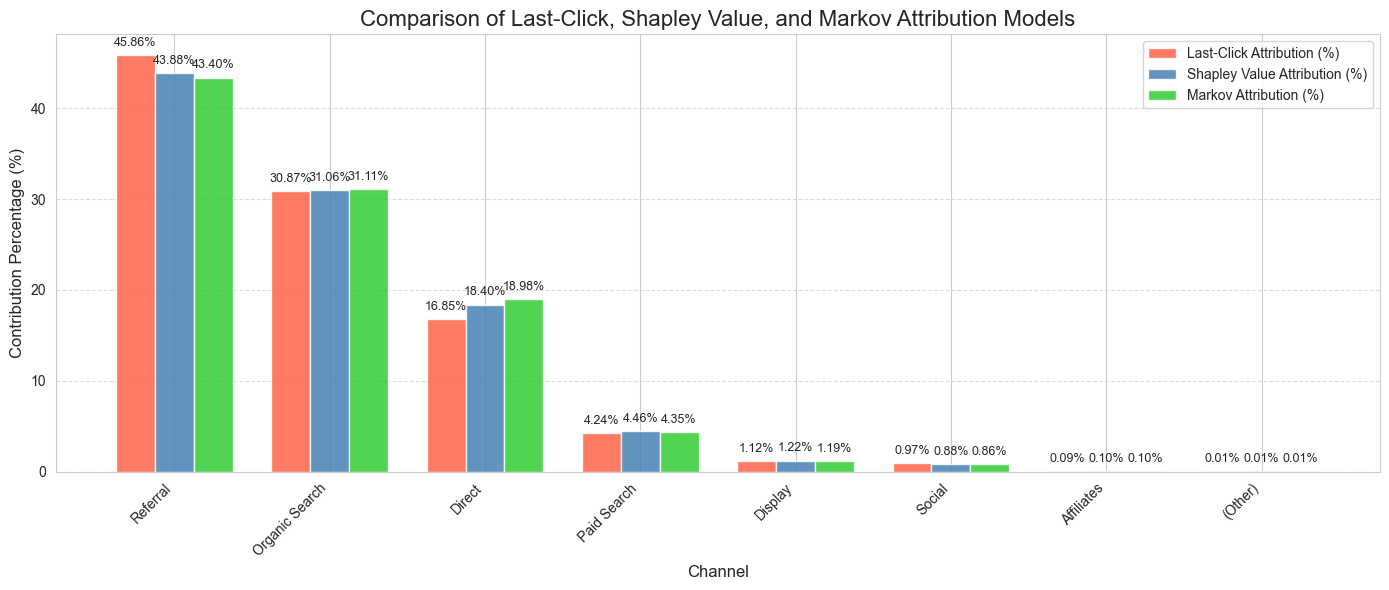

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to simulate Markov Attribution
def calculate_markov(df, path_col, conversion_col):
    """
    Simulate a basic Markov attribution model and convert to percentages.
    """
    # Initialize attribution dictionary
    attribution = {}
    total_conversions = df[conversion_col].sum()  # Calculate total conversions for normalization

    for _, row in df.iterrows():
        # Split the path into channels
        path = row[path_col].split(" > ")
        # Divide the conversion evenly among all channels in the path
        value = row[conversion_col]
        for channel in path:
            attribution[channel] = attribution.get(channel, 0) + value / len(path)

    # Normalize values to percentages
    for channel in attribution:
        attribution[channel] = (attribution[channel] / total_conversions) * 100

    # Create a DataFrame from the attribution dictionary
    markov_df = pd.DataFrame(list(attribution.items()), columns=["Channel", "Markov Attribution (%)"])
    return markov_df


# Generate markov_df using the function
markov_df = calculate_markov(attribution_df, "path", "total_conversions")

# Merge data for comparison
comparison_df = pd.merge(last_click_df, shapley_df, on="Channel", how="inner").fillna(0)
comparison_df = pd.merge(comparison_df, markov_df, on="Channel", how="inner").fillna(0)

# Rename columns for clarity
comparison_df.rename(
    columns={
        "Last-Click Conversion (%)": "Last-Click Attribution (%)",
        "Shapley Value Contribution (%)": "Shapley Value Attribution (%)",
        "Markov Attribution (%)": "Markov Attribution (%)"
    },
    inplace=True
)

# Extract data for plotting
channels = comparison_df["Channel"]
last_click_values = comparison_df["Last-Click Attribution (%)"]
shapley_values = comparison_df["Shapley Value Attribution (%)"]
markov_values = comparison_df["Markov Attribution (%)"]

# Create positions for grouped bars
x = np.arange(len(channels))
width = 0.25

# Create a figure for side-by-side bar chart
fig, ax = plt.subplots(figsize=(14, 6))

# Plot bars for Last-Click, Shapley Value, and Markov models
bars1 = ax.bar(x - width, last_click_values, width, label='Last-Click Attribution (%)', color='#FF6347', alpha=0.85)
bars2 = ax.bar(x, shapley_values, width, label='Shapley Value Attribution (%)', color='#4682B4', alpha=0.85)
bars3 = ax.bar(x + width, markov_values, width, label='Markov Attribution (%)', color='#32CD32', alpha=0.85)

# Add annotations for each bar
for bar, value in zip(bars1, last_click_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{value:.2f}%', ha='center', fontsize=9)

for bar, value in zip(bars2, shapley_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{value:.2f}%', ha='center', fontsize=9)

for bar, value in zip(bars3, markov_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{value:.2f}%', ha='center', fontsize=9)

# Customize the chart
ax.set_title('Comparison of Last-Click, Shapley Value, and Markov Attribution Models', fontsize=16)
ax.set_xlabel('Channel', fontsize=12)
ax.set_ylabel('Contribution Percentage (%)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(channels, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=10, loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()


Referral and Organic Search:

  * These channels dominate in all models, with Referral contributing ~45% and Organic Search ~31%. Shapley Value slightly reduces Referral's dominance by crediting other channels.

Direct:

  * Gains slightly more credit under Markov Value (18.98%) compared to Last-Click (16.85%), reflecting its role across the journey.

Paid Search, Display, and Social:

  * Shapley Value gives these channels slightly more credit, showing their influence earlier in multi-touch paths.

Takeaways:

  *  Focus on Referral and Organic Search as key drivers while optimizing Paid Search, Display, and Social for earlier engagement.